In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
import seaborn
import pandas as pd

Download Txt GRID DATA
http://services.swpc.noaa.gov/text/aurora-nowcast-map.txt

In [5]:
ls Data/

aurora-nowcast-map.txt  sampleData.txt


In [7]:
aurora=np.loadtxt('Data/aurora-nowcast-map.txt')

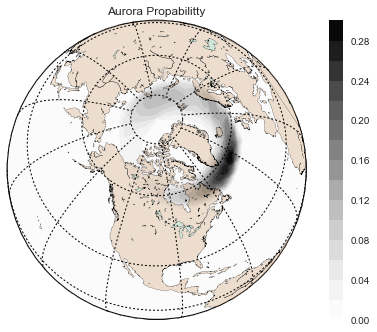

In [30]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
m = Basemap(projection='ortho',lat_0=70,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
m.drawcoastlines(linewidth=0.2)
#m.drawcountries(linewidth=0.2)
m.fillcontinents(color='#cc9966',lake_color='#99ffff',alpha=0.3)
# draw the edge of the map projection region (the projection limb)
m.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 512
nlons = 1024
delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])

# compute native map projection coordinates of lat/lon grid.
x, y = m(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = m.contourf(x,y,aurora/100.,15,linewidths=1.5)#,cmap='viridis')
plt.colorbar(cs)
plt.title('Aurora Propabilitty')
plt.show()